In [2]:
 #Phase and Bloch Sphere
from qiskit import * 
from qiskit.tools.visualization import plot_bloch_multivector
from qiskit.visualization import plot_histogram
%matplotlib inline
import math

Aer.backends()


[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator'),
 PulseSimulator('pulse_simulator')]

In [3]:
qasm_simulator = Aer.get_backend('qasm_simulator')
statevector_simulator = Aer.get_backend('statevector_simulator')

In [4]:
def run_on_simulators(circuit):
    statevec_job = execute(circuit, backend=statevector_simulator)
    result = statevec_job.result()
    statevec = result.get_statevector()

    num_qubits = circuit.num_qubits

    circuit.measure([i for i in range(num_qubits)], [i for i in range(num_qubits)])

    qasm_job = execute(circuit, backend=qasm_simulator, shots=1024).result()
    counts = qasm_job.get_counts()

    return statevec, counts

In [5]:
circuit = QuantumCircuit(2,2)
statevec, counts = run_on_simulators(circuit)

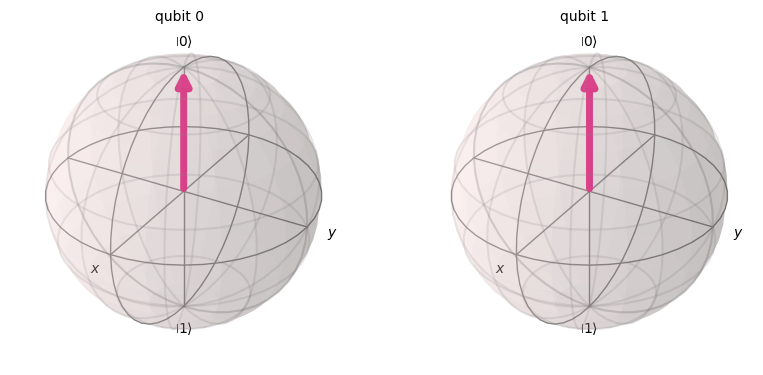

In [6]:
plot_bloch_multivector(statevec)

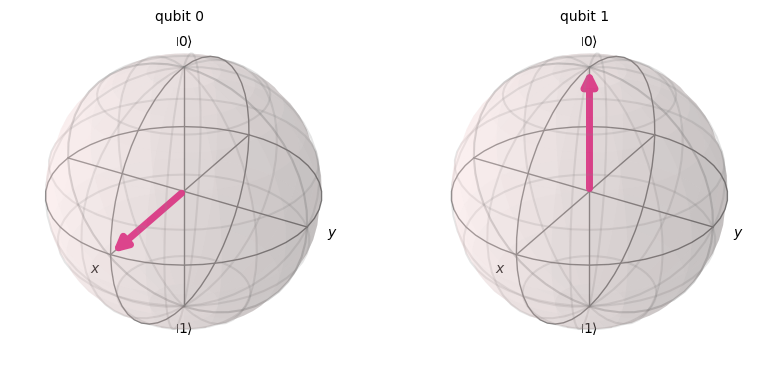

In [19]:
circuit.h(0)
statevec, counts = run_on_simulators(circuit)
plot_bloch_multivector(statevec)


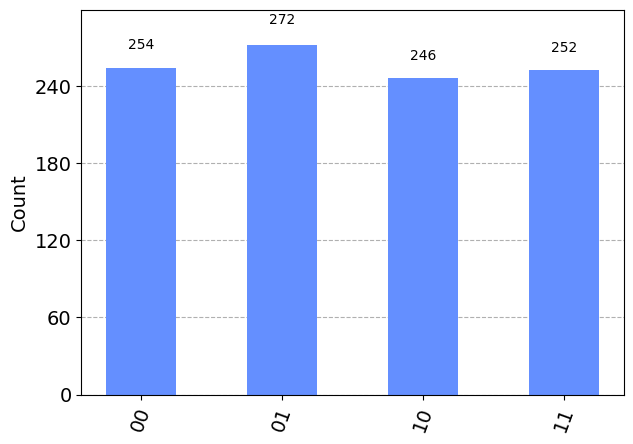

In [20]:
plot_histogram([counts])

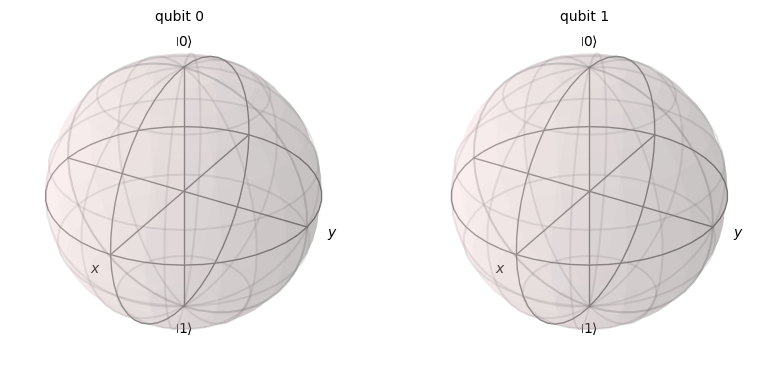

In [21]:
circuit = QuantumCircuit(2,2)
circuit.h(0)
circuit.cx(0,1)
statevec, counts = run_on_simulators(circuit)
plot_bloch_multivector(statevec)


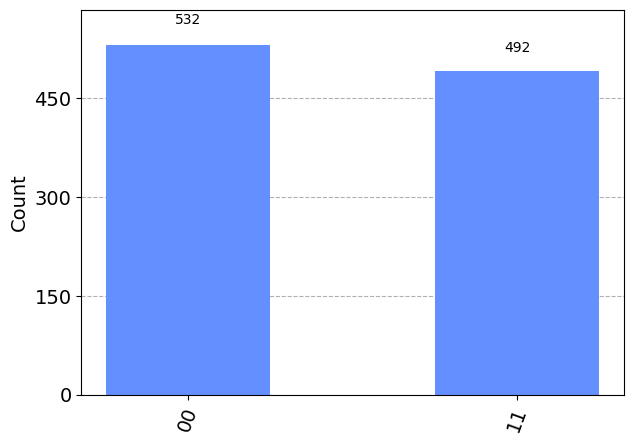

In [22]:
plot_histogram([counts])

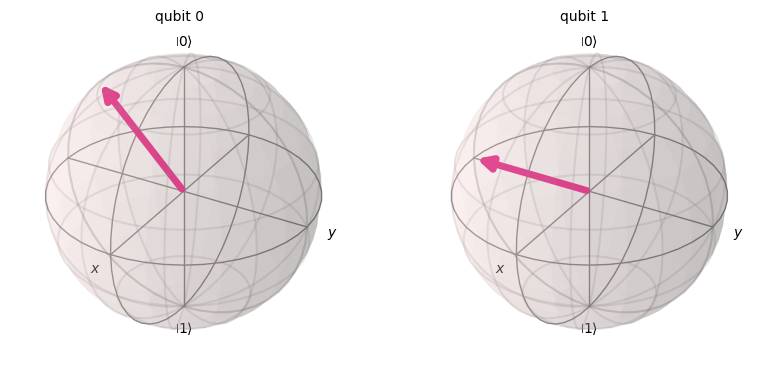

In [27]:
circuit = QuantumCircuit(2,2)
circuit.rx(math.pi/4,0)
circuit.rx(math.pi/2,1)
statevec, counts = run_on_simulators(circuit)
plot_bloch_multivector(statevec)

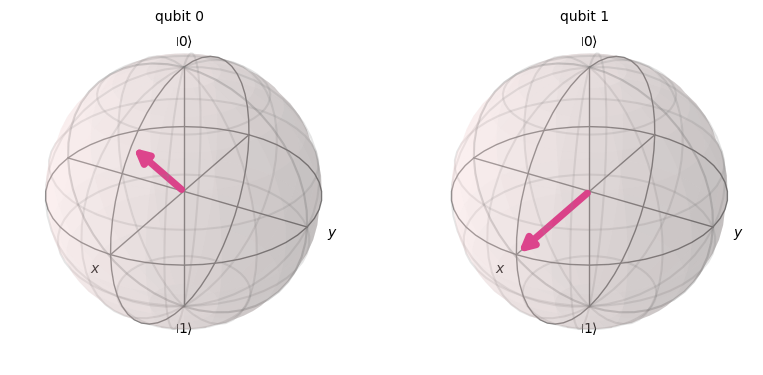

In [28]:
circuit = QuantumCircuit(2,2)
circuit.ry(math.pi/4,0)
circuit.ry(math.pi/2,1)
statevec, counts = run_on_simulators(circuit)
plot_bloch_multivector(statevec)

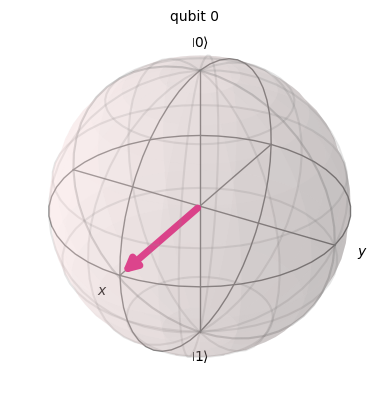

In [38]:
circuit = QuantumCircuit(1,1)
circuit.h(0)
statevec, counts = run_on_simulators(circuit)
plot_bloch_multivector(statevec)